Objective: Test the central limit theorem and work with random number generation and graphs in Python.

# Центральная предельная теорема

## Гистограмма выборки

В нашей задаче будем рассматривать Гамма-распределение случайной величины с параметрами $k = 2$, $\theta\ = 2$

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
rv = sts.gamma(2, scale=2)
sample = rv.rvs(1000)

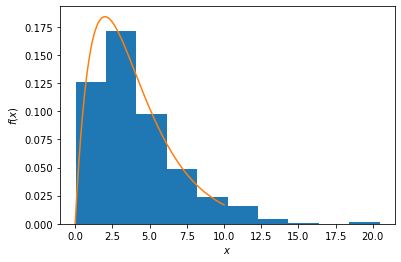

In [3]:
plt.hist(sample, density=True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

x = np.linspace(0,10,1000)
pdf = rv.pdf(x)
plt.plot(x, pdf)

Вывод: гистограмма выборки хорошо совпадает с теоретической плотностью распределения

# Распределение выборочных средних

Мы имеем Гамма-распределение: $\mathbb{E}X = k\theta\, = 2$, $\mathbb{D}X = k\theta^{2}\, = 8$.

Таким образом, распределение выборочных средних Гамма-распределения с $k = 2$, $\theta\ = 2$ будет приближаться нормальным распределением $N(\mu = 4, \sigma^2 = \frac{8}{n})$

In [4]:
def generation_pdf(n):
    means = []
    for _ in range(1000):
        sample = rv.rvs(n)
        means.append(np.mean(sample))
    
    # найдем значения параметров нормального распределения
    mu = 4
    sigma = (8./n) ** 0.5
    norm_rv = sts.norm(loc=mu, scale=sigma)
    
    x = np.linspace(0, 8, 100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf)
    plt.hist(means, density = True)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title(f'n = {n}')
    plt.show()

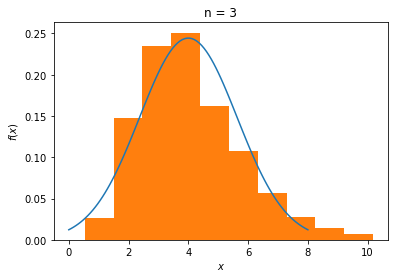

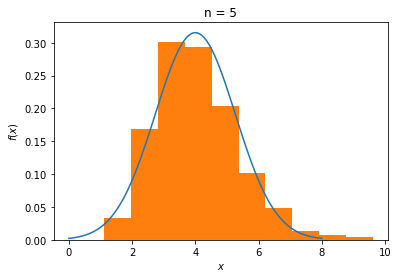

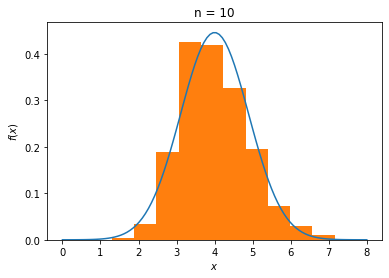

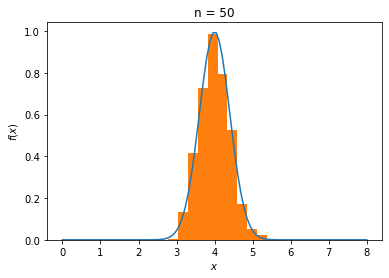

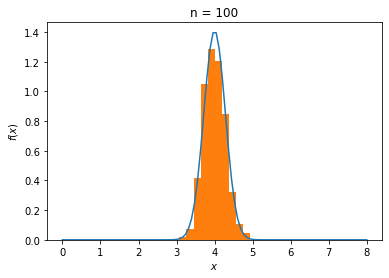

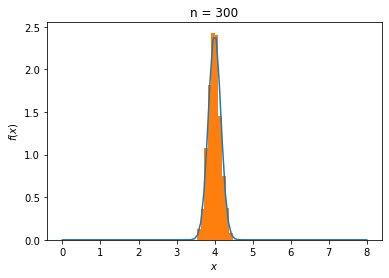

In [5]:
for n in [3, 5, 10, 50, 100, 300]:
    generation_pdf(n)

Вывод: можно заметить, что при увеличении n нормальное распределение лучше ложится на распределение выборочных средних. При $n \leq 3$ распределение несимметричное, смещенное влево, а уже при $n \geq 50$ наше распределение имеет вид соотвествующий нормальному